In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RES_DIR = Path("/lustre/groups/ml01/workspace/louis.kuemmerle/projects/G1/results/spapros_smk_res")

benchmarks_dir = RES_DIR / "benchmarks" / "selection"
selections_dir = RES_DIR / "selection"
m_specific_dir = RES_DIR / "method_specific"

In [3]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
SMALL_SIZE = 9  # 17
MEDIUM_SIZE = 11  # 19
BIGGER_SIZE = 13  # 21
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# time measurements

## time dependency on different variables

In [4]:
# Load selections and parameters
df = pd.read_csv(RES_DIR / "selection_overview.csv", index_col=0)
df = df.loc[df["batch"] == "batch4"]
df["n_cts"] = df["n_cts"].astype(int)
df["cells_per_ct"] = df["cells_per_ct"].astype("object")
df.loc[~df["cells_per_ct"].isnull(), "cells_per_ct"] = df.loc[~df["cells_per_ct"].isnull(), "cells_per_ct"].astype(int).astype(str)
df.loc[df["cells_per_ct"].isnull(), "cells_per_ct"] = "None"
df["cells_per_ct"] = df["cells_per_ct"].astype("category").cat.reorder_categories(["100", "500", "1000", "None"])

# Set index to selection names (unique)
assert (len(df) == len(df["selection_name"].unique()))
df = df.set_index("selection_name")

# Load time measurements
df["time_seconds"] = 0
for name in df.index:
    df.loc[name, "time_seconds"] = pd.read_csv(selections_dir / f"{name}_info.csv", index_col=0)["time_seconds"].values[0]

df["time_hours"] = df["time_seconds"] / 3600

df["time (h)"] = df["time_hours"]
df["number of cell types"] = df["n_cts"]

/tmp/ipykernel_2183326/1102704008.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '870.59894323349' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[name, "time_seconds"] = pd.read_csv(selections_dir / f"{name}_info.csv", index_col=0)["time_seconds"].values[0]


In [5]:
sns.__version__

'0.13.1'

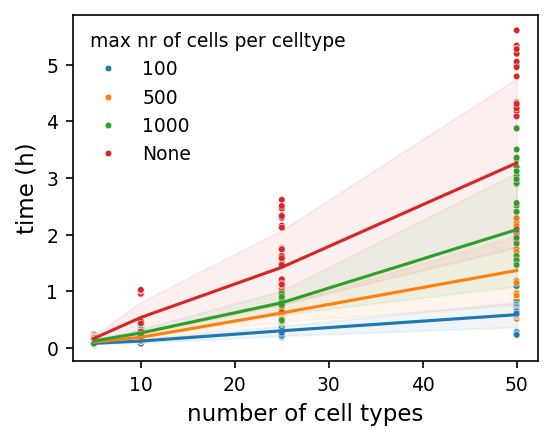

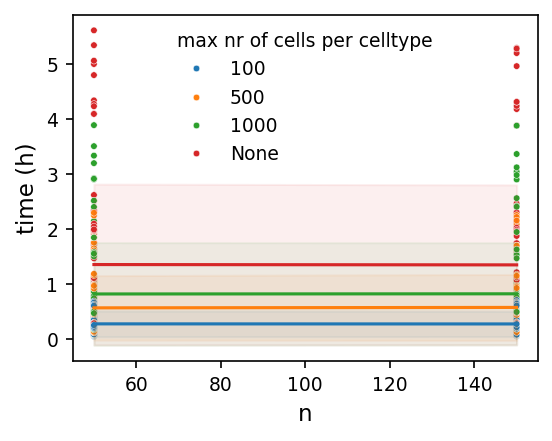

In [7]:
fig = plt.figure(figsize=(4, 3))
# n_cts
sns.scatterplot(data=df, x="number of cell types", y="time (h)", hue="cells_per_ct", s=10) #, style="n")
sns.lineplot(data=df, x="number of cell types", y="time (h)",
             hue="cells_per_ct", errorbar="sd", legend=False, err_kws={"alpha":0.07})  # , style="n")
leg = plt.legend(title='max nr of cells per celltype', frameon=False)
leg._legend_box.align = "left"
fig.savefig("./figures/1_8_time_vs_n_cts.pdf", bbox_inches='tight', transparent=True)
plt.show()

# n
fig = plt.figure(figsize=(4, 3))
sns.scatterplot(data=df, x="n", y="time (h)", hue="cells_per_ct", s=10) #, style="n")
sns.lineplot(data=df, x="n", y="time (h)",
             hue="cells_per_ct", errorbar="sd", legend=False, err_kws={"alpha":0.07})  # , style="n")
leg = plt.legend(title='max nr of cells per celltype', frameon=False)
leg._legend_box.align = "left"
fig.savefig("./figures/1_8_time_vs_n.pdf", bbox_inches='tight', transparent=True)
plt.show()

## Spapros steps time

In [8]:
# Load selections and parameters
df = pd.read_csv(RES_DIR / "selection_overview.csv", index_col=0)
df = df.loc[df["batch"] == "batch4"]
df["n_cts"] = df["n_cts"].astype(int)
df["cells_per_ct"] = df["cells_per_ct"].astype("object")
df.loc[~df["cells_per_ct"].isnull(), "cells_per_ct"] = df.loc[~df["cells_per_ct"].isnull(), "cells_per_ct"].astype(int).astype(str)
df.loc[df["cells_per_ct"].isnull(), "cells_per_ct"] = "None"
df["cells_per_ct"] = df["cells_per_ct"].astype("category").cat.reorder_categories(["100", "500", "1000", "None"])

# Set index to selection names (unique)
assert (len(df) == len(df["selection_name"].unique()))
df = df.set_index("selection_name")

# Load time measurements
df["time_seconds"] = 0.0

# Load time measurements of Spapros steps
dfs = {"PCA":df.copy(), "DE_forest":df.copy(), "PCA_forest":df.copy()}
step_name = {"PCA":"PCA", "DE_forest":"DE trees", "PCA_forest":"PCA trees"}
for step in dfs.keys():
    dfs[step]["step"] = step_name[step]

for name in df.index:
    df_tmp = pd.read_csv(m_specific_dir / name / "time_measurements.csv", index_col=0)
    df_tmp = pd.Series(df_tmp["time (s)"].values, index=df_tmp["step"].values)
    for step in dfs.keys():
        dfs[step].loc[name, "time_seconds"] = df_tmp.loc[step + "_selection"]

df = pd.concat(dfs.values(), axis=0)

df["time_hours"] = df["time_seconds"] / 3600

df["time (h)"] = df["time_hours"]
df["number of cell types"] = df["n_cts"]

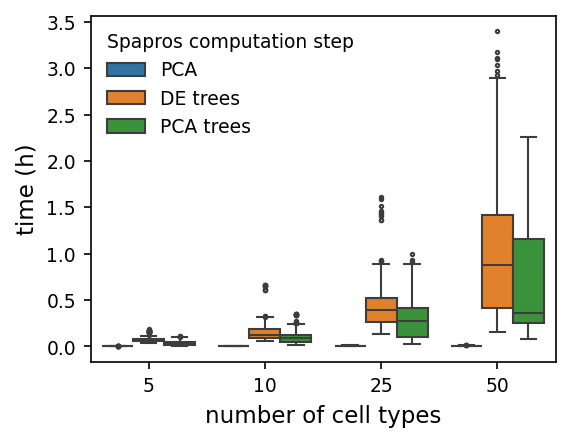

In [9]:
fig = plt.figure(figsize=(4, 3))
sns.boxplot(data=df, x="number of cell types", y="time (h)", hue="step", flierprops = dict(marker='o', markersize=1.6))
leg = plt.legend(title='Spapros computation step', frameon=False)
leg._legend_box.align = "left"
fig.savefig("./figures/1_8_time_vs_n_cts_spapros_steps.pdf", bbox_inches='tight', transparent=True)
plt.show()

# memory measurements

In [10]:
# Load selections and parameters
df = pd.read_csv(RES_DIR / "selection_overview.csv", index_col=0)
df = df.loc[df["batch"] == "batch4"]
df["n_cts"] = df["n_cts"].astype(int)
df["cells_per_ct"] = df["cells_per_ct"].astype("object")
df.loc[~df["cells_per_ct"].isnull(), "cells_per_ct"] = df.loc[~df["cells_per_ct"].isnull(),
                                                              "cells_per_ct"].astype(int).astype(str)
df.loc[df["cells_per_ct"].isnull(), "cells_per_ct"] = "None"
df["cells_per_ct"] = df["cells_per_ct"].astype("category").cat.reorder_categories(["100", "500", "1000", "None"])

# Set index to selection names (unique)
assert (len(df) == len(df["selection_name"].unique()))
df = df.set_index("selection_name")

# Load memory measurements
GB_per_MiB = 0.001048576
df["memory_GB"] = 0
for name in df.index:
    #if Path(benchmarks_dir / f"{name}.benchmark.txt").exists():
    df.loc[name, "memory_GB"] = pd.read_csv(
        benchmarks_dir / f"{name}.benchmark.txt", sep="\t"
    ).T[0]["max_uss"] * GB_per_MiB #max_uss
    #else:
    #    print(f"{name} not found")


df["memory (GB)"] = df["memory_GB"]
df["number of cell types"] = df["n_cts"]


/tmp/ipykernel_2183326/3630181999.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '18.51201159168' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[name, "memory_GB"] = pd.read_csv(


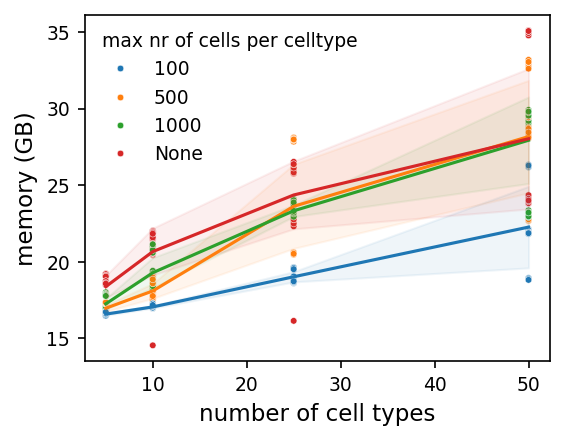

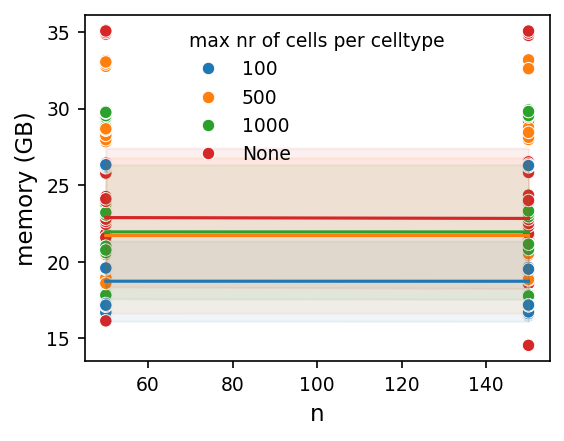

In [11]:
# n_cts
fig = plt.figure(figsize=(4, 3))
sns.scatterplot(data=df, x="number of cell types", y="memory (GB)", hue="cells_per_ct", s=10) #, style="n")
sns.lineplot(data=df, x="number of cell types", y="memory (GB)",
             hue="cells_per_ct", errorbar="sd", legend=False, err_kws={"alpha":0.07})  # , style="n")
leg = plt.legend(title='max nr of cells per celltype', frameon=False)
leg._legend_box.align = "left"
fig.savefig("./figures/1_8_memory_vs_n_cts.pdf", bbox_inches='tight', transparent=True)
plt.show()

# n
fig = plt.figure(figsize=(4, 3))
sns.scatterplot(data=df, x="n", y="memory (GB)", hue="cells_per_ct") #, style="n")
sns.lineplot(data=df, x="n", y="memory (GB)",
             hue="cells_per_ct", errorbar="sd", legend=False, err_kws={"alpha":0.07})  # , style="n")
leg = plt.legend(title='max nr of cells per celltype', frameon=False)
leg._legend_box.align = "left"
fig.savefig("./figures/1_8_memory_vs_n.pdf", bbox_inches='tight', transparent=True)
plt.show()